In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import time

import numpy as np
import torch
import pytorch_lightning as pl
from pytorch_lightning import loggers

#
# Source Code
#

import config

from utils.Visual import draw_plot, notify
from utils.TrainHelper import TrainHelper, get_all_models_data
from utils.RobustnessExperiment import RobustnessExperiment, load_experiment

from classification.models.M5 import M5PLModule
from classification.models.SpectrogramCNN import SpectrogramCNNPLModule
from classification.models.SpectrogramCNN_8K import SpectrogramCNN_8KPLModule
from classification.models.CRNN import CRNNPLModule
from classification.models.CRNN_8k import CRNN8kPLModule

from attacks.pgd import ProjectedGradientDescent, PGD_Real

/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


# Sample Rate Comparison

Loaded model 0022_EVAL_EASY_FINAL


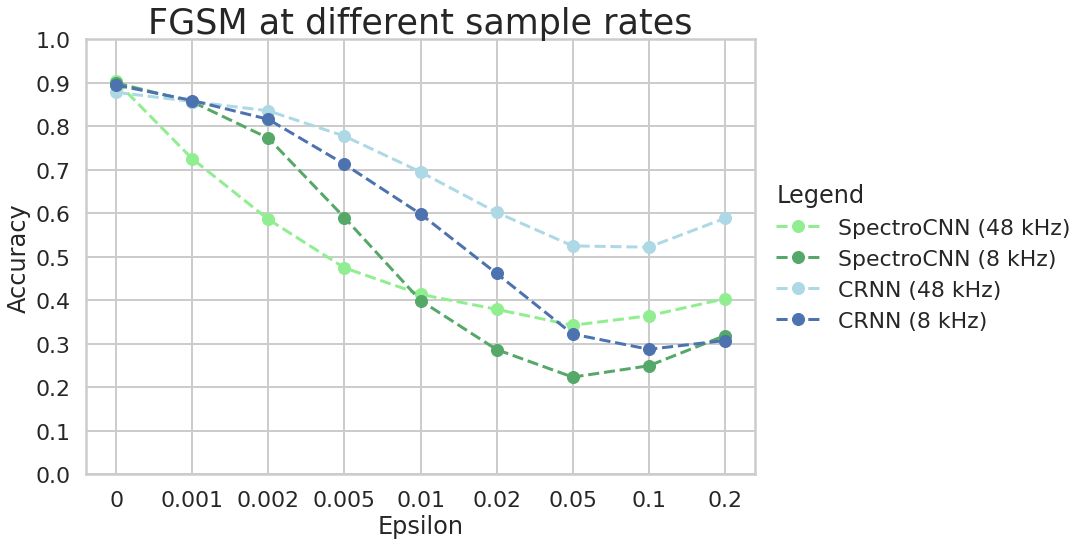

In [3]:
experiment = load_experiment(exp_folder = "0022_EVAL_EASY_FINAL")

experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                       #("optuna_deepRecursive0.8796680497925311.p", "Deep Rec"),
                       ('SpectrogramCNN_optuna_90.5.p', "SpectroCNN (48 kHz)"),
                       ("SpectrogramCNN_8k_vanilla_0.8998.p", "SpectroCNN (8 kHz)"),
                       ('vanilla_0.878.p', "CRNN (48 kHz)"),
                       ('CRNN8k_vanilla_0.8951.p', "CRNN (8 kHz)"),
                       ],
                  colors = ["lightgreen", "g", "lightblue", "b"], plot_title = "FGSM at different sample rates")

# Robustness Comparison - Different Norms

In [4]:
experiment = load_experiment(exp_folder = "0031_ALL_NORMS")
experiment.show_evaluated_models()

Loaded model 0031_ALL_NORMS


['M5_vanilla.p',
 'M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p',
 'SpectrogramCNN_8k_vanilla_0.8998.p',
 'SpectrogramCNN_8K_attack_L_inf_eps=0.1_iters=1_v6.p',
 'CRNN8k_vanilla_0.8951.p',
 'CRNN8k_attack_L_inf_eps=0.03_iters=2_v11.p']

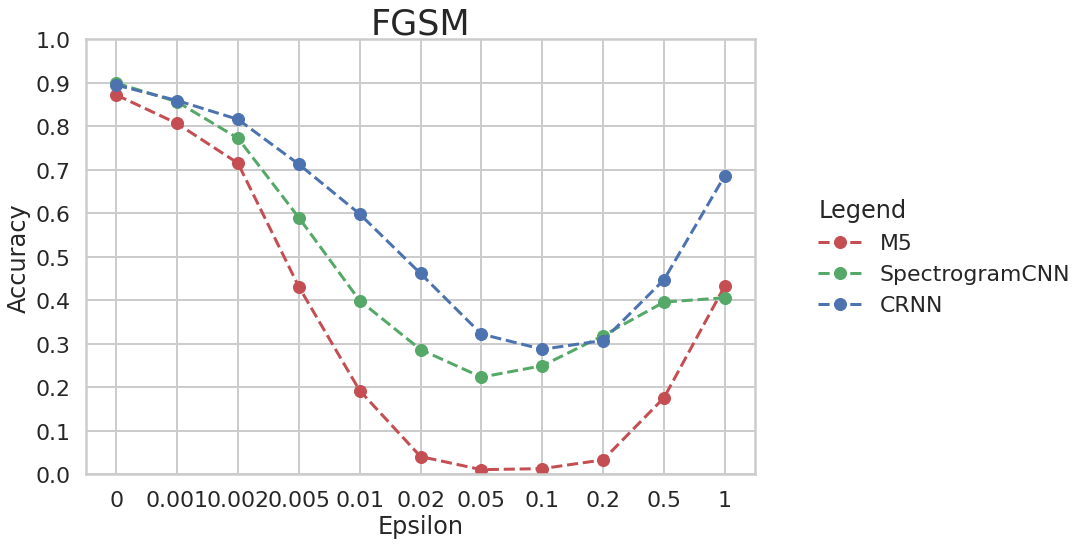

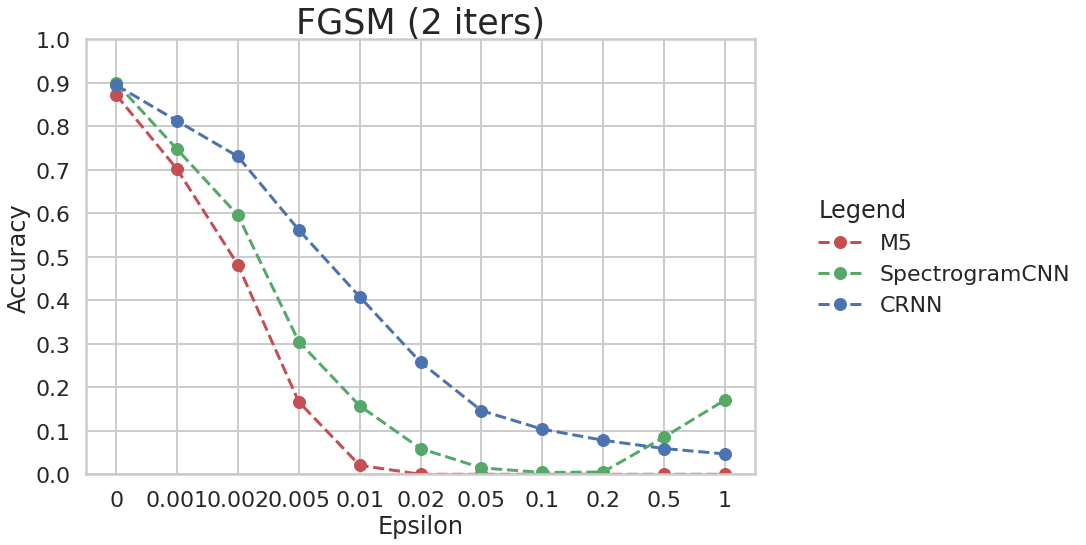

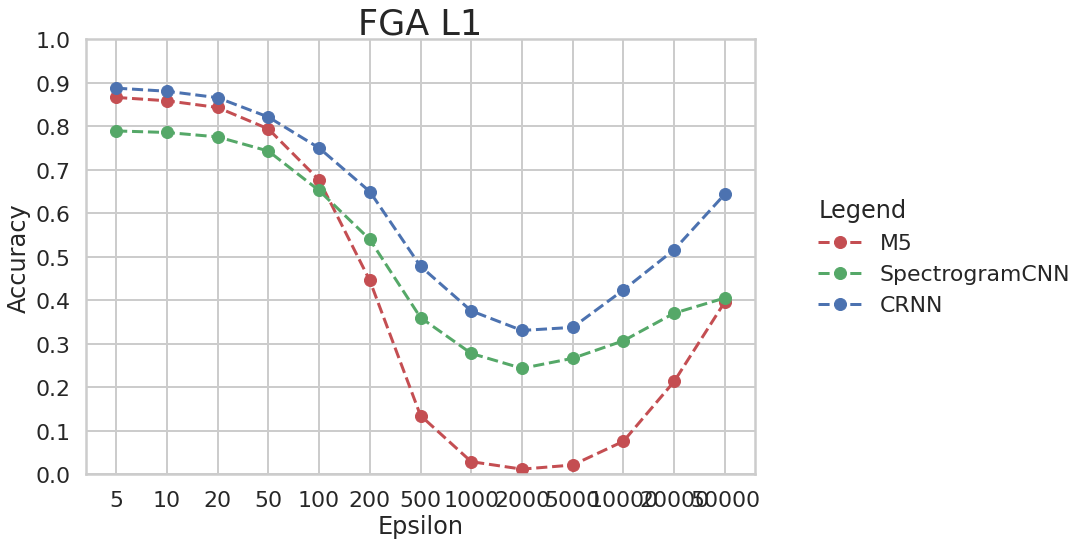

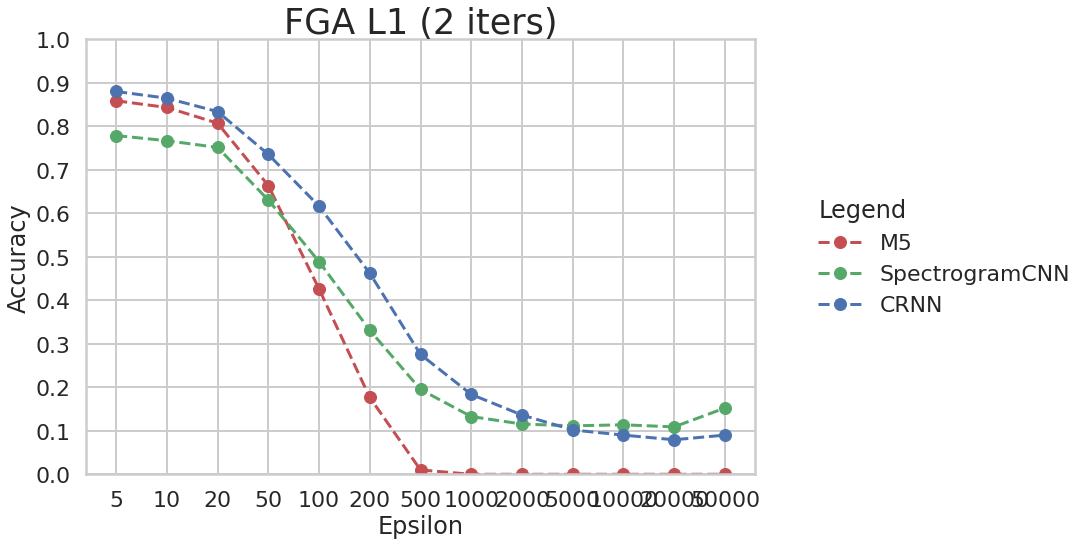

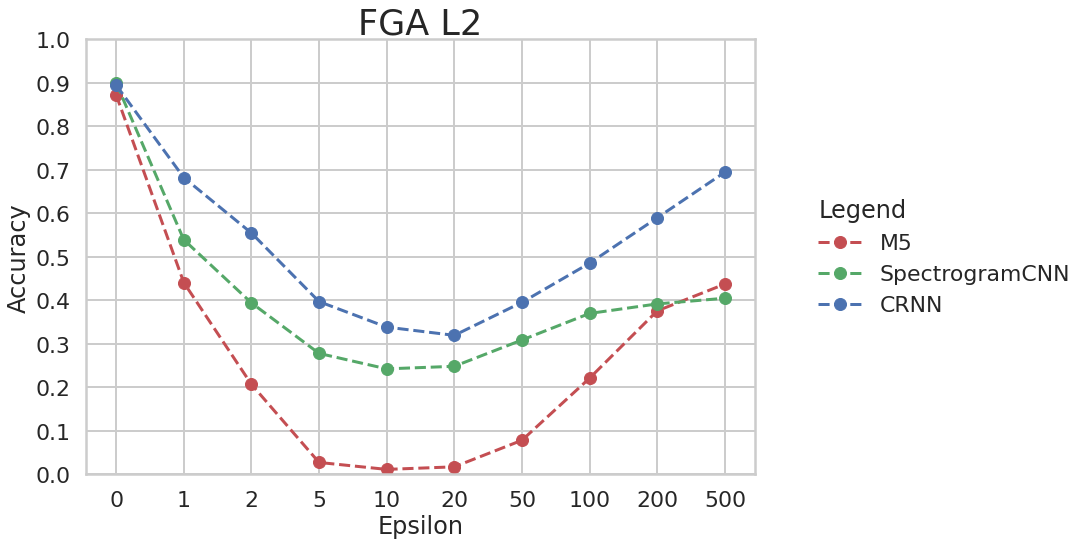

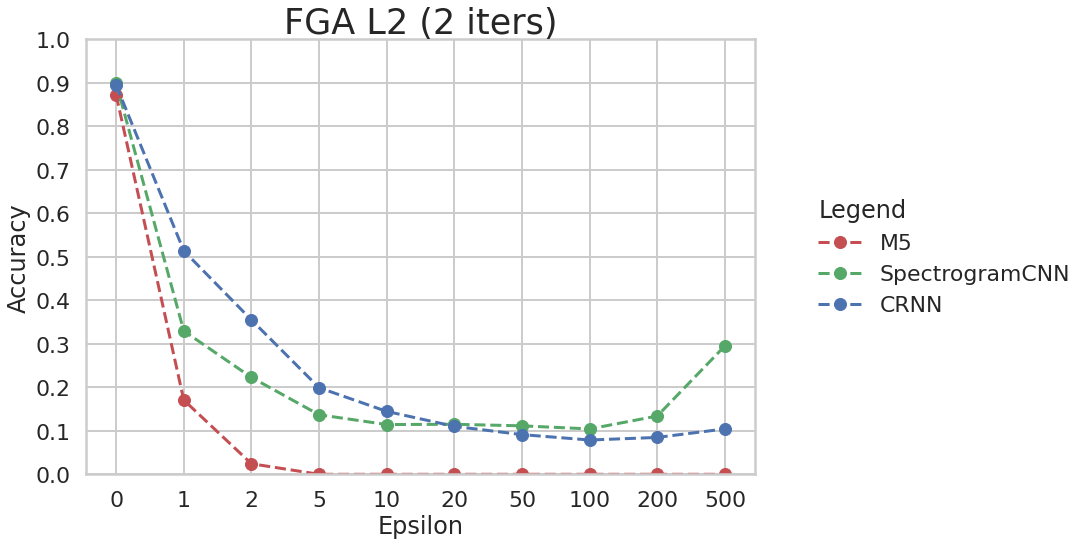

In [5]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                       ('M5_vanilla.p', "M5"),
                       ('SpectrogramCNN_8k_vanilla_0.8998.p', "SpectrogramCNN"),
                       ('CRNN8k_vanilla_0.8951.p', "CRNN"),
                       ], colors=["r", "g", "b"])

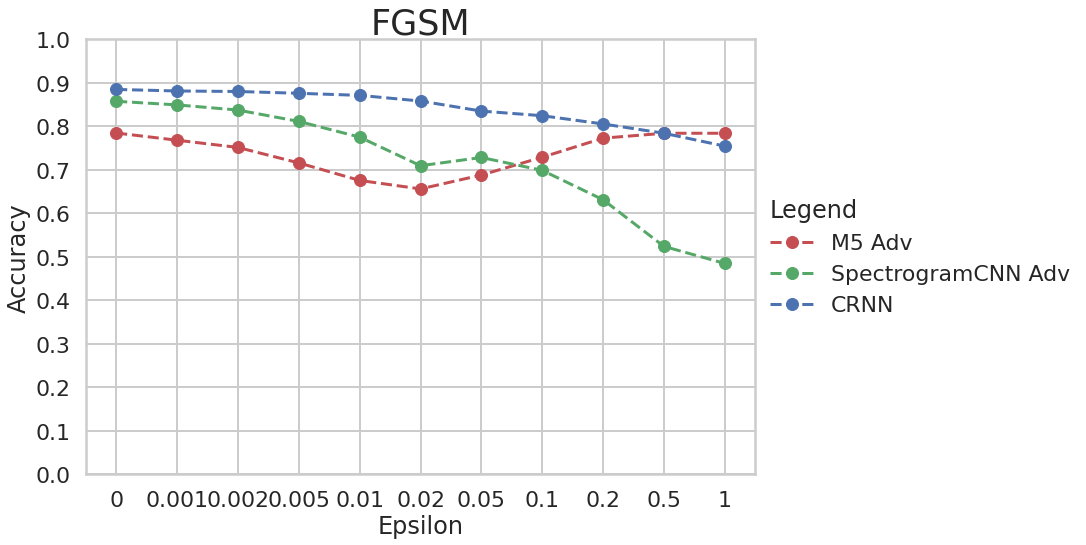

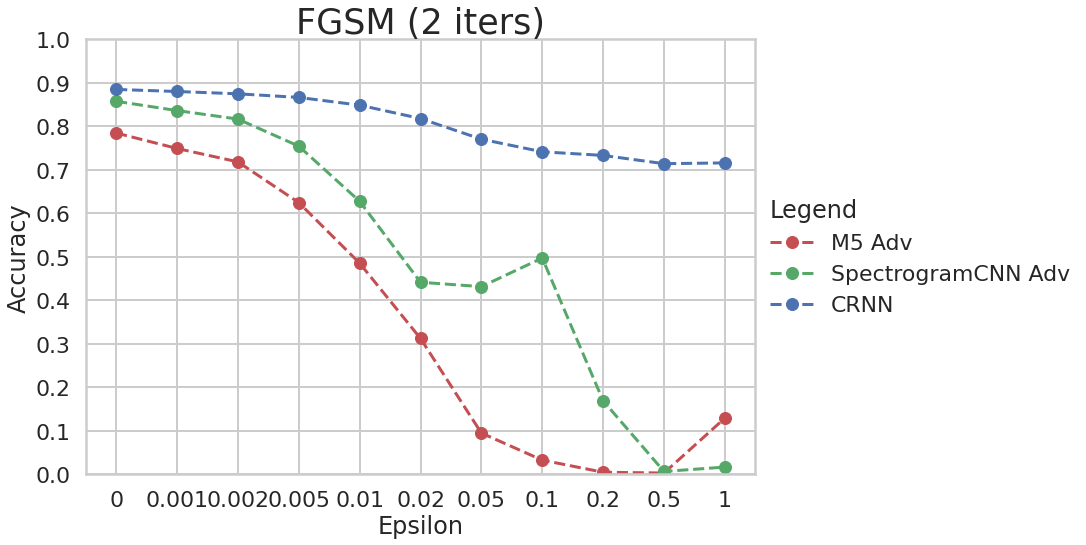

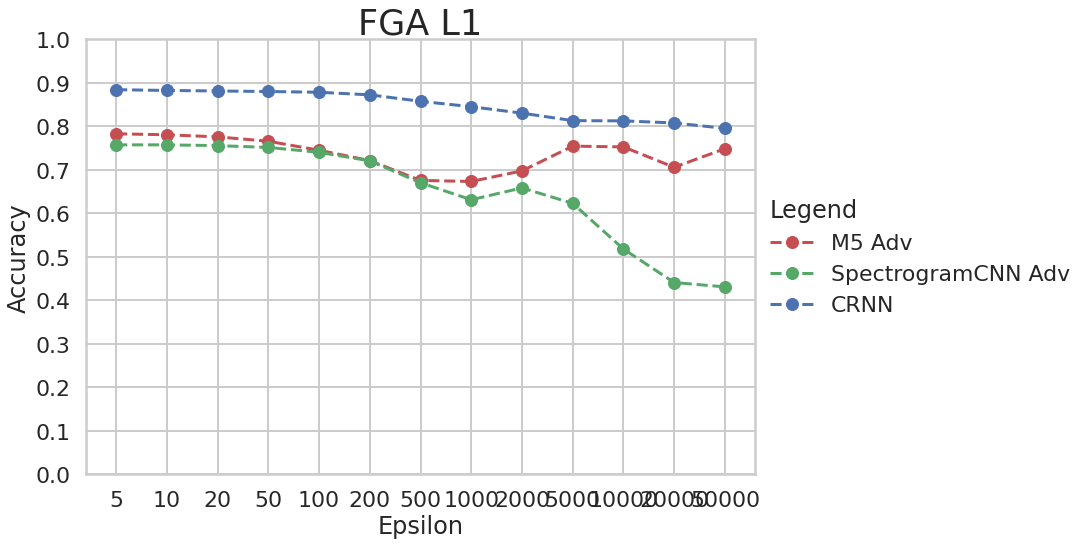

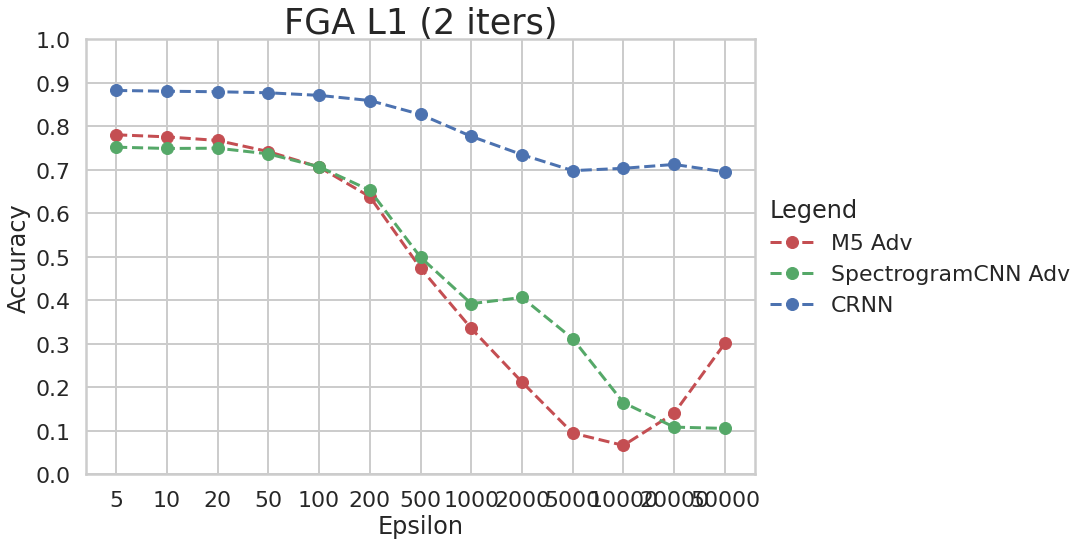

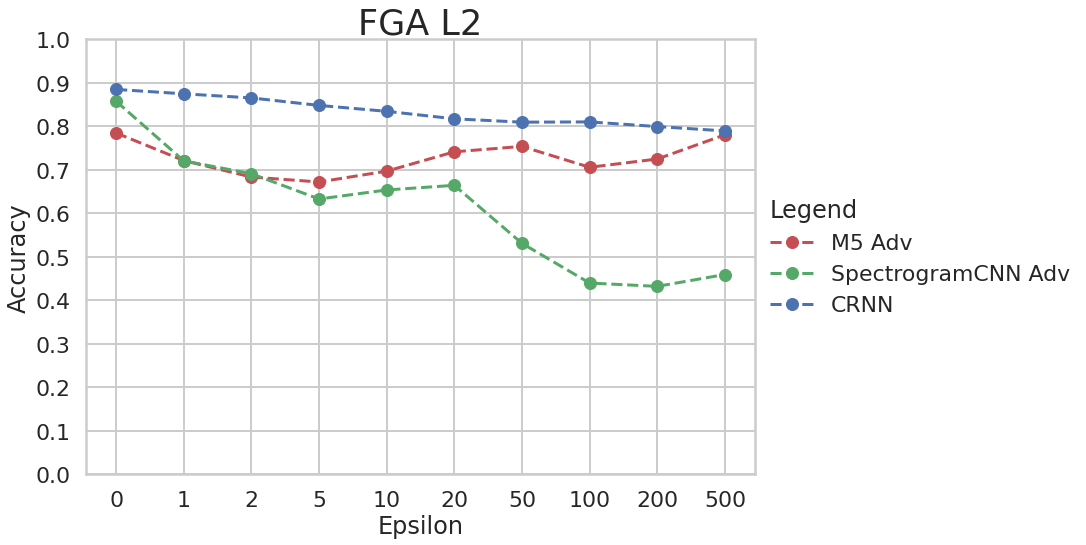

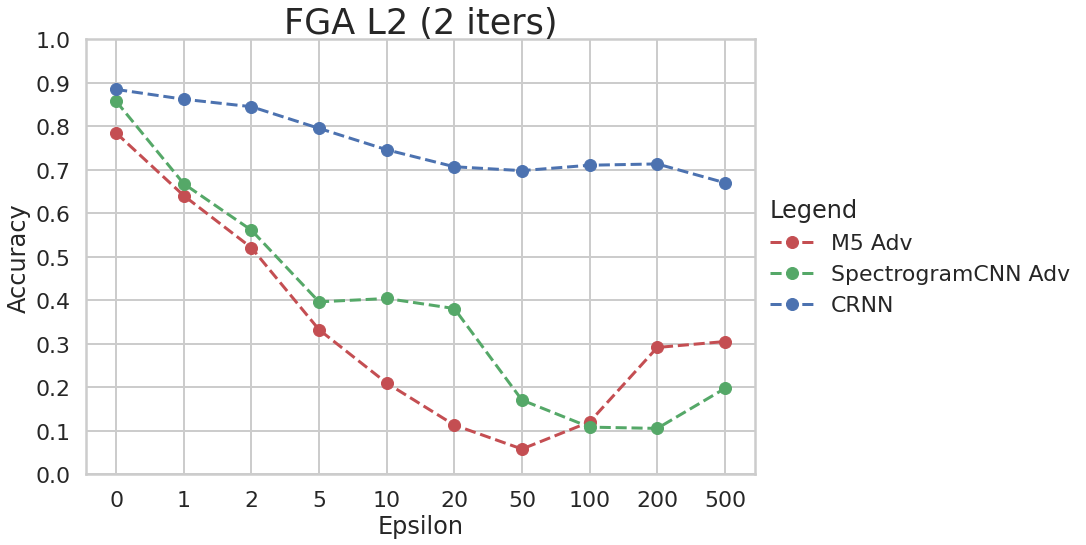

In [6]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                       ('M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p', "M5 Adv"),
                       ('SpectrogramCNN_8K_attack_L_inf_eps=0.1_iters=1_v6.p', "SpectrogramCNN Adv"),
                       ('CRNN8k_attack_L_inf_eps=0.03_iters=2_v11.p', "CRNN"),
                       ], colors=["r", "g", "b"])

In [7]:
experiment = load_experiment(exp_folder = "0033_ALL_NORMS_REAL")
experiment.show_evaluated_models()

Loaded model 0033_ALL_NORMS_REAL


['M5_vanilla.p',
 'M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p',
 'SpectrogramCNN_8k_vanilla_0.8998.p',
 'SpectrogramCNN_8K_attack_L_inf_eps=0.1_iters=1_v6.p',
 'CRNN8k_vanilla_0.8951.p',
 'CRNN8k_attack_L_inf_eps=0.03_iters=2_v11.p']

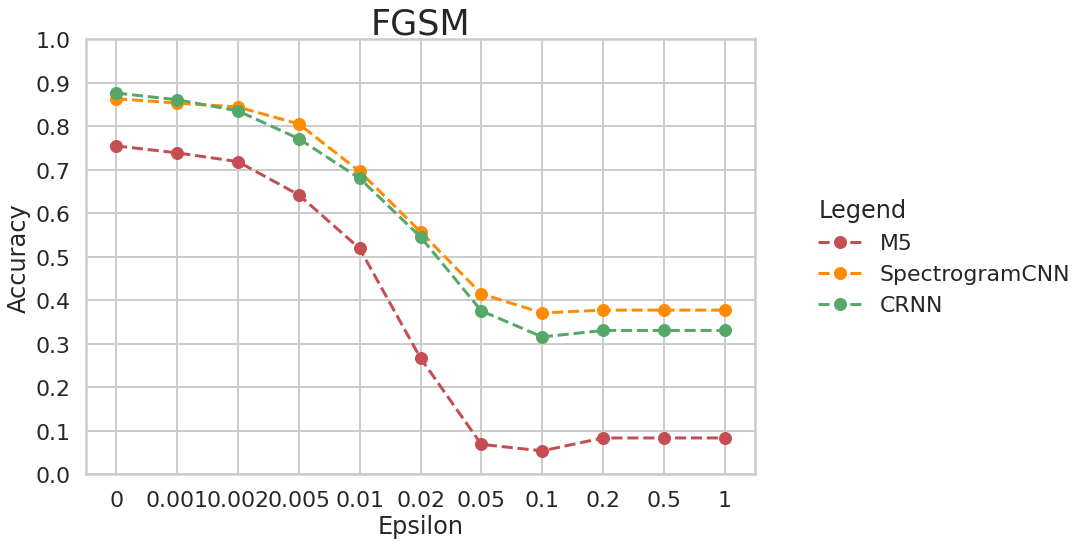

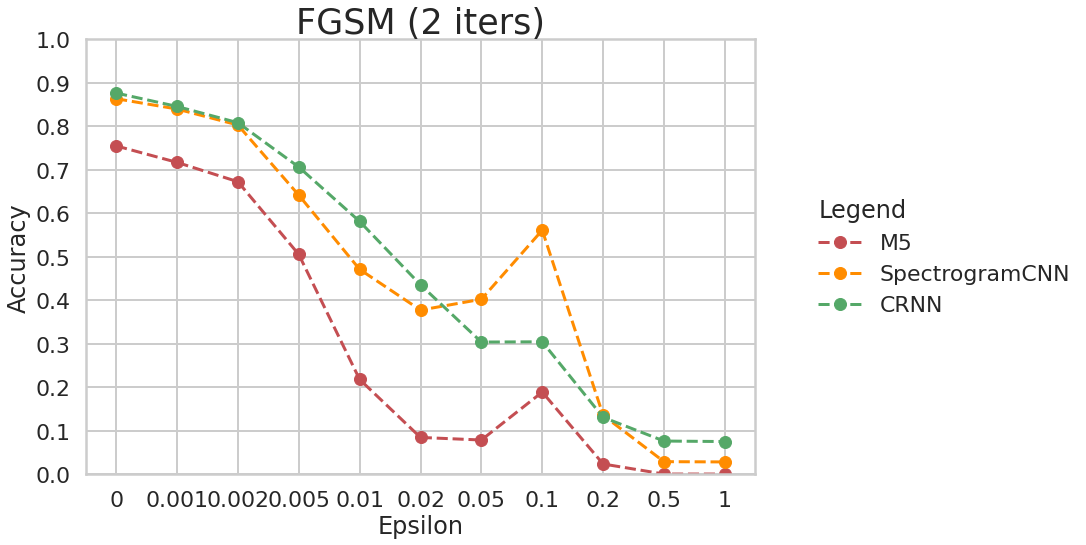

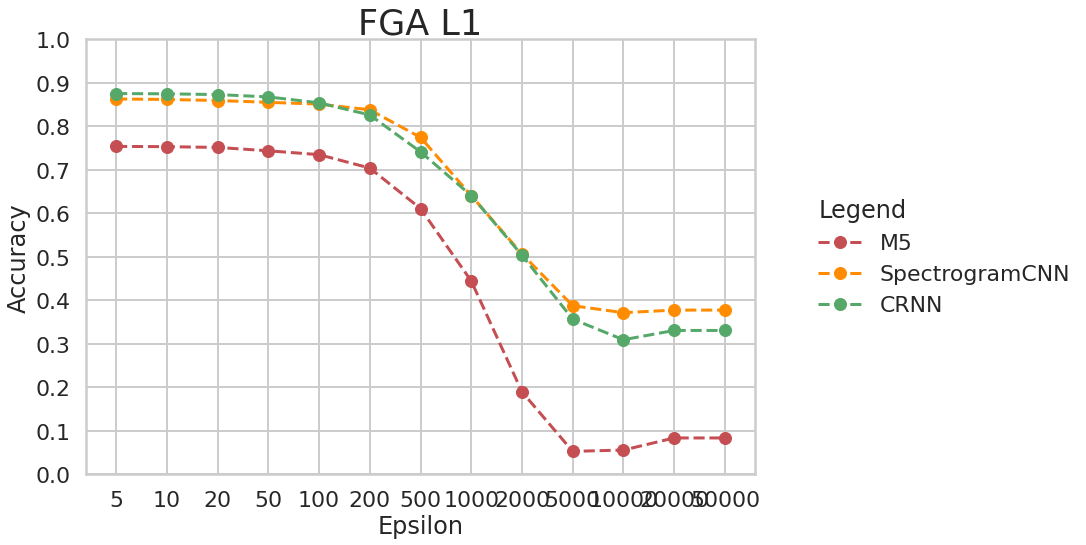

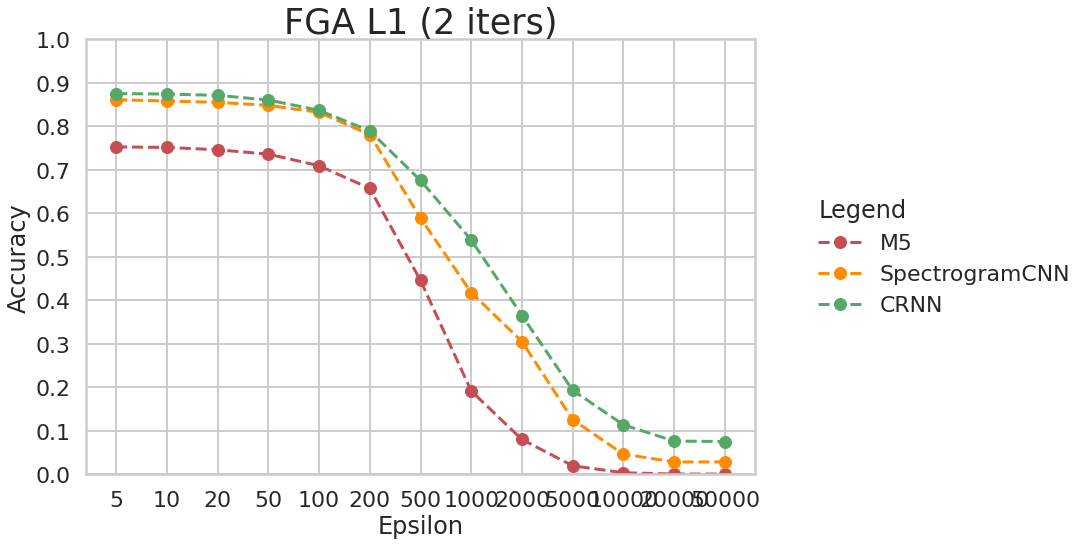

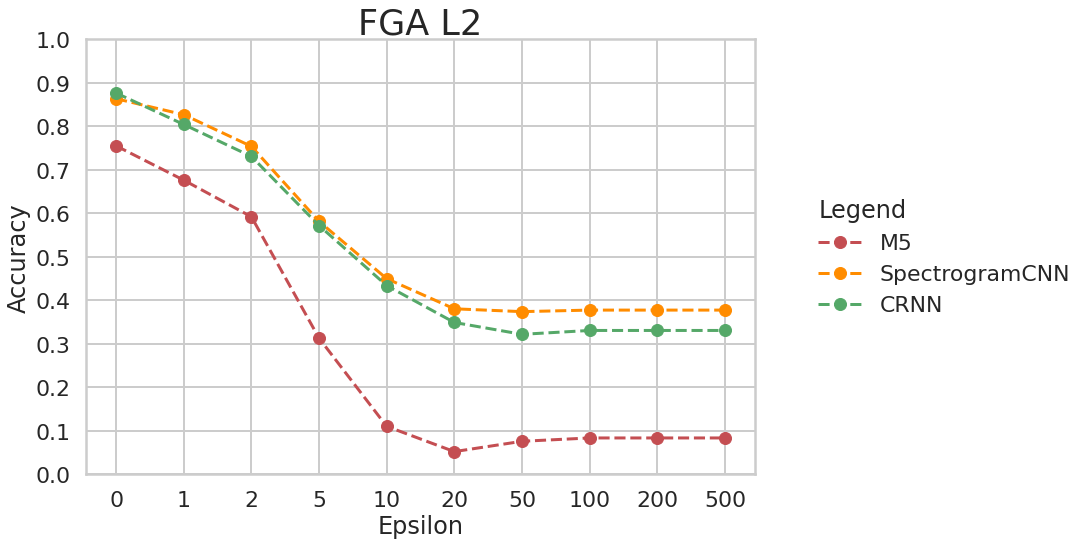

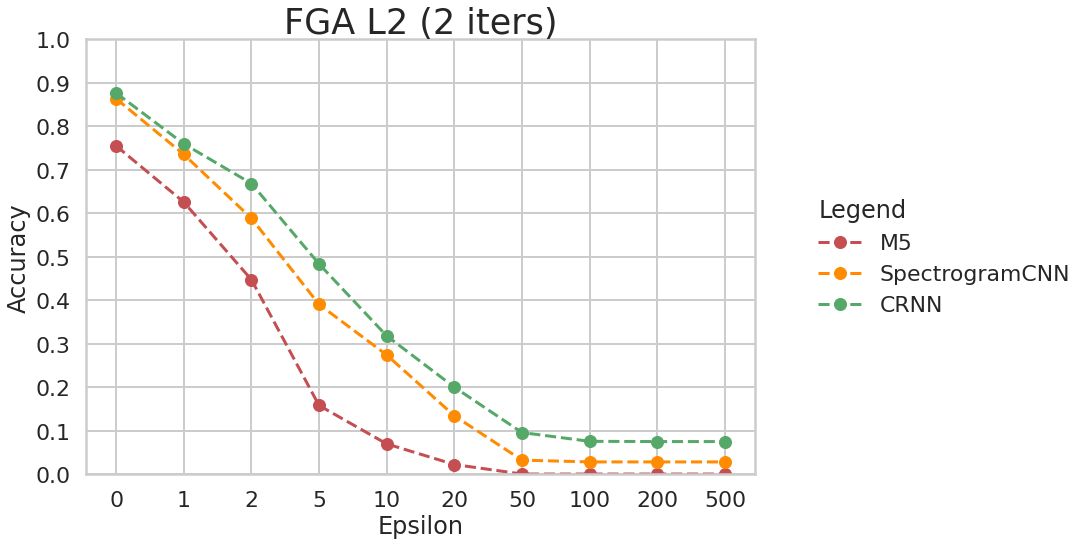

In [8]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                       ('M5_vanilla.p', "M5"),
                       ('SpectrogramCNN_8k_vanilla_0.8998.p', "SpectrogramCNN"),
                       ('CRNN8k_vanilla_0.8951.p', "CRNN"),
                       ])

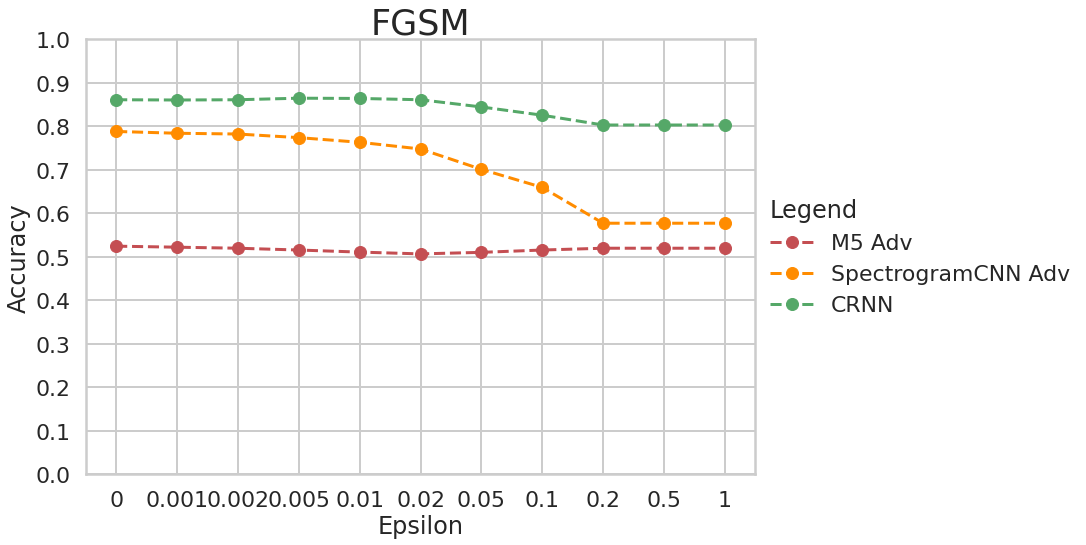

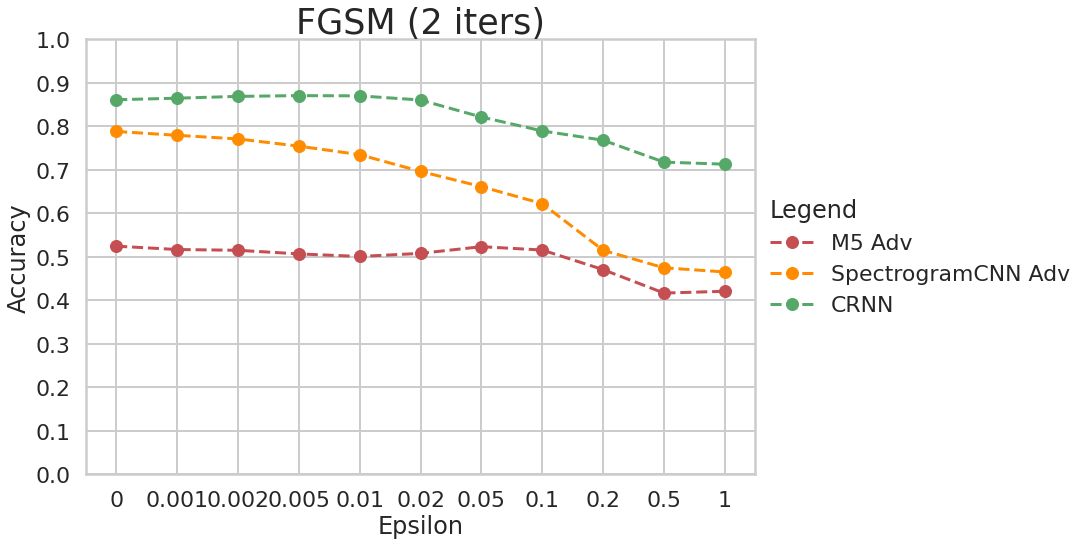

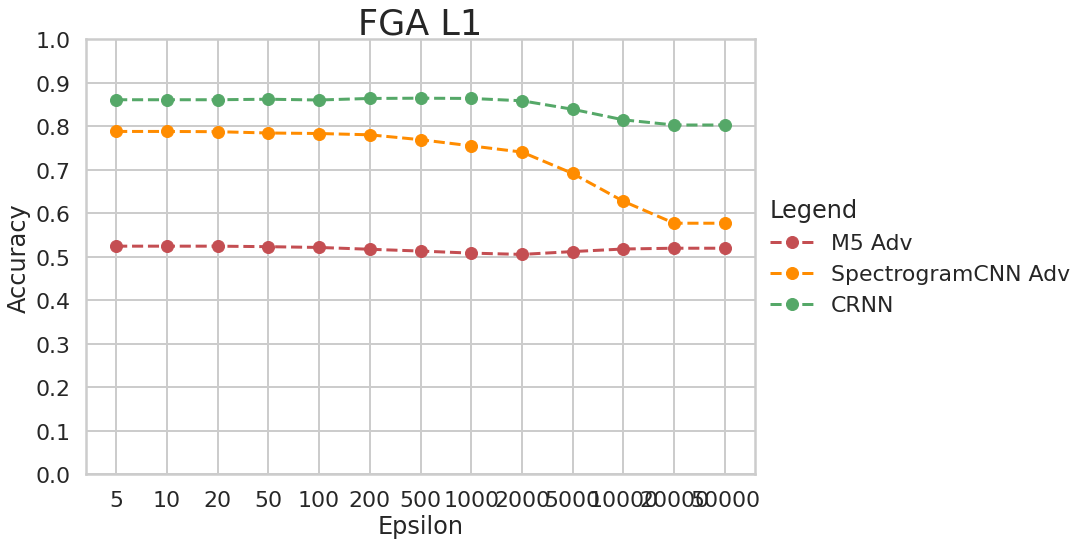

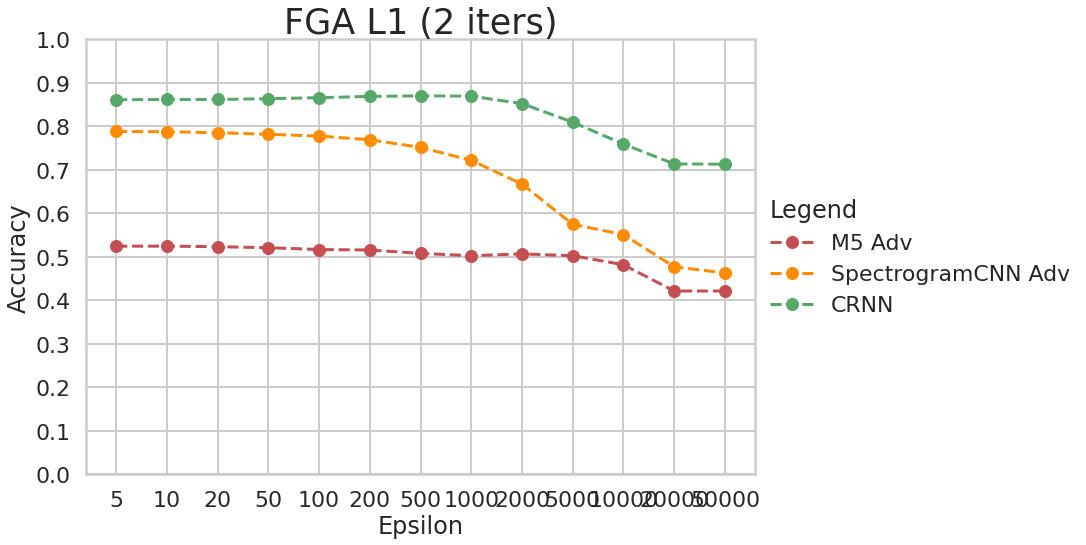

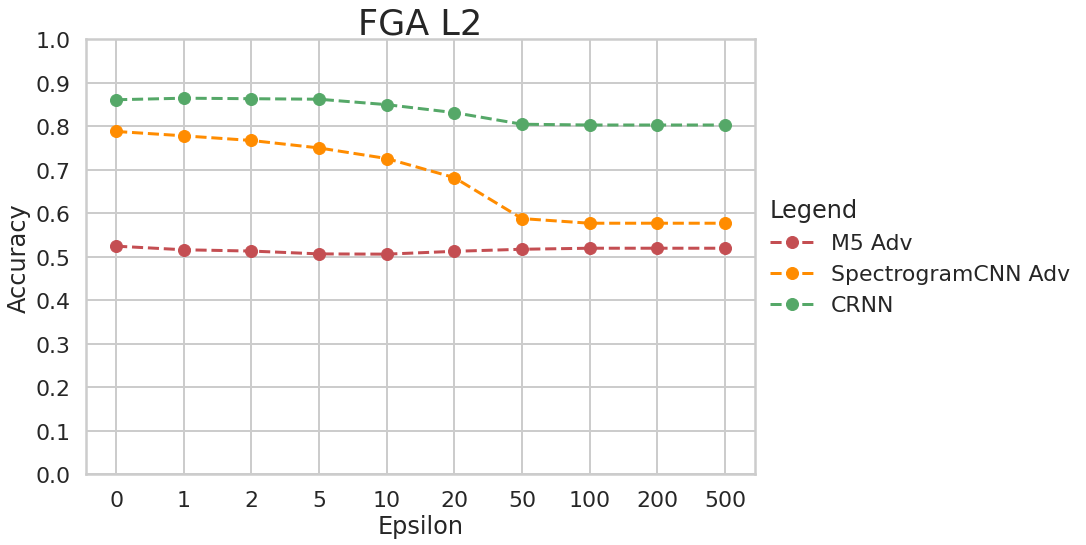

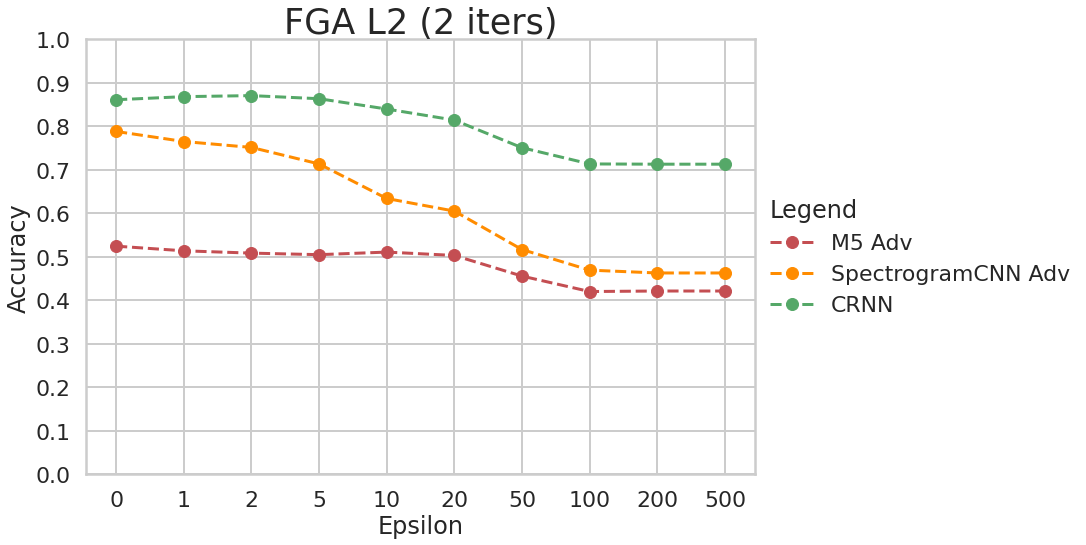

In [9]:
experiment.compare(config_key = "epsilon", results_key = "acc", 
                   models=[
                       ('M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p', "M5 Adv"),
                       ('SpectrogramCNN_8K_attack_L_inf_eps=0.1_iters=1_v6.p', "SpectrogramCNN Adv"),
                       ('CRNN8k_attack_L_inf_eps=0.03_iters=2_v11.p', "CRNN"),
                       ])

# N EPOCHS

Loaded model 0022_EVAL_EASY_FINAL


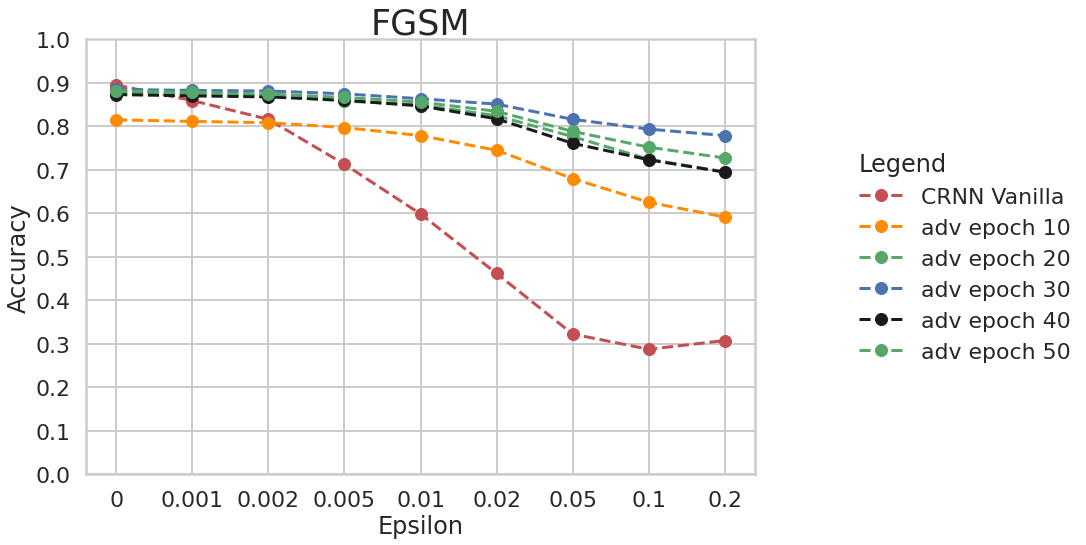

In [10]:
experiment = load_experiment(exp_folder = "0022_EVAL_EASY_FINAL")

experiment.compare(config_key = "epsilon", results_key = "acc", models=[
    ("CRNN8k_vanilla_0.8951.p", "CRNN Vanilla"),
    ("CRNN8k_attack_L_inf_eps=0.025_iters=2_v4_epoch_10.p", "adv epoch 10"),
    ("CRNN8k_attack_L_inf_eps=0.025_iters=2_v4_epoch_20.p", "adv epoch 20"),
    ("CRNN8k_attack_L_inf_eps=0.025_iters=2_v4_epoch_30.p", "adv epoch 30"),
    ("CRNN8k_attack_L_inf_eps=0.025_iters=2_v4_epoch_40.p", "adv epoch 40"),
    ("CRNN8k_attack_L_inf_eps=0.025_iters=2_v4.p", "adv epoch 50"),
])

# Functional Attack Evaluation

In [12]:
experiment = load_experiment(exp_folder = "0048_INTERPOLATION_test_2 iters")

Loaded model 0048_INTERPOLATION_test_2 iters


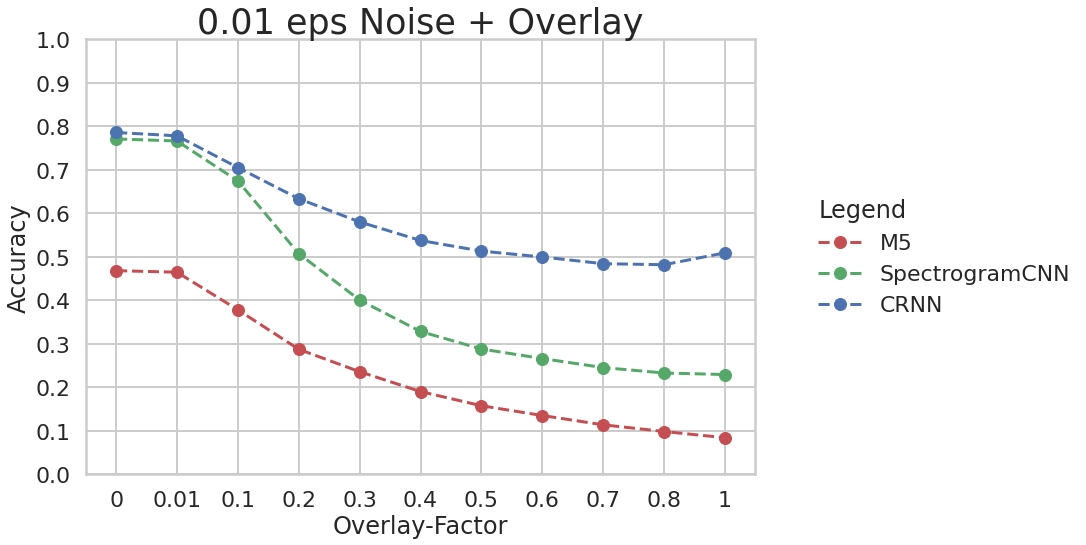

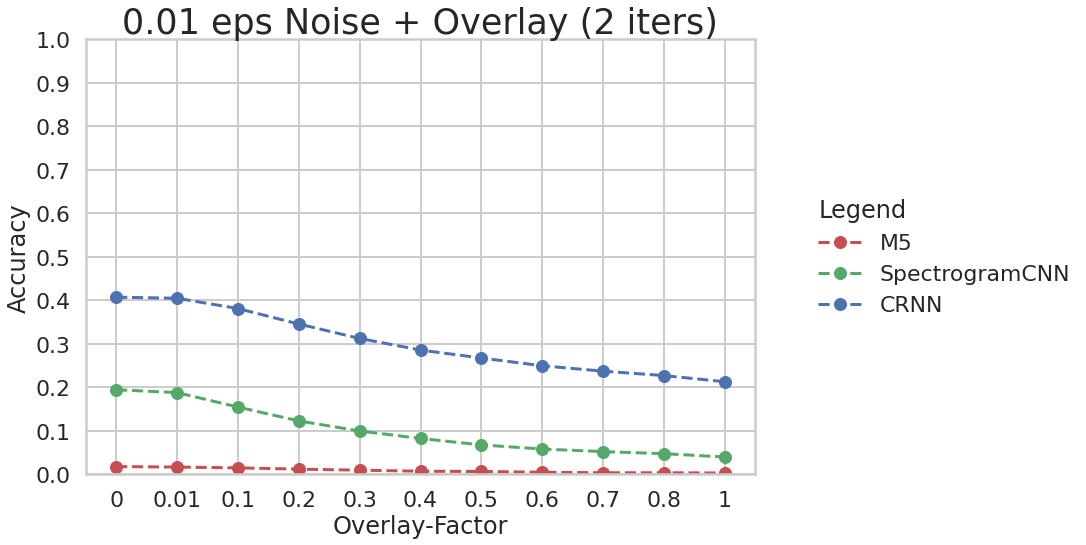

In [13]:
experiment.compare(config_key = "upper2", results_key = "acc", 
                   models=[
                       ('M5_vanilla.p', "M5"),
                       ('SpectrogramCNN_8k_vanilla_0.8998.p', "SpectrogramCNN"),
                       ('CRNN8k_vanilla_0.8951.p', "CRNN"),
                       ],  colors=["r", "g", "b"], x_title="Overlay-Factor")

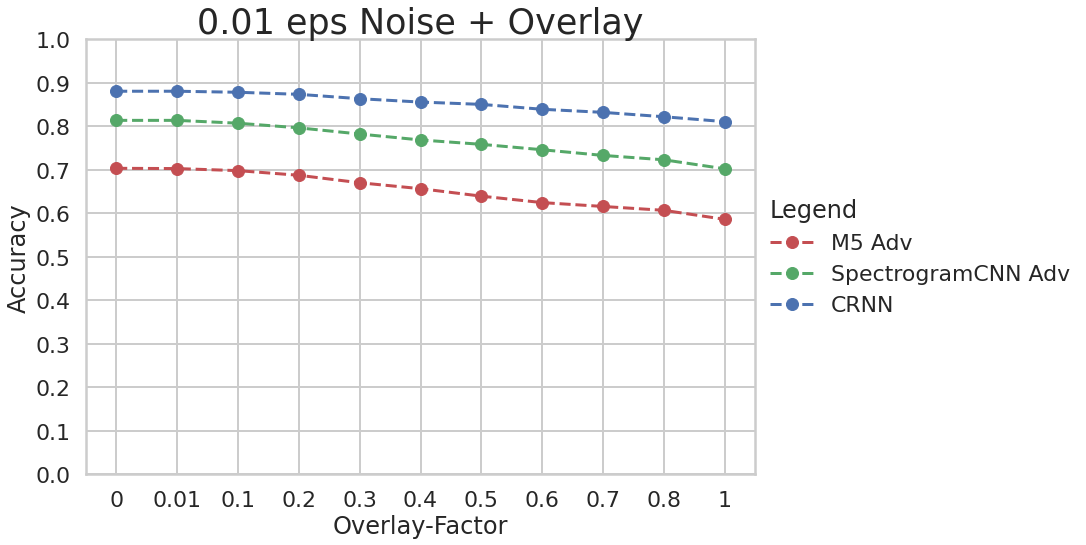

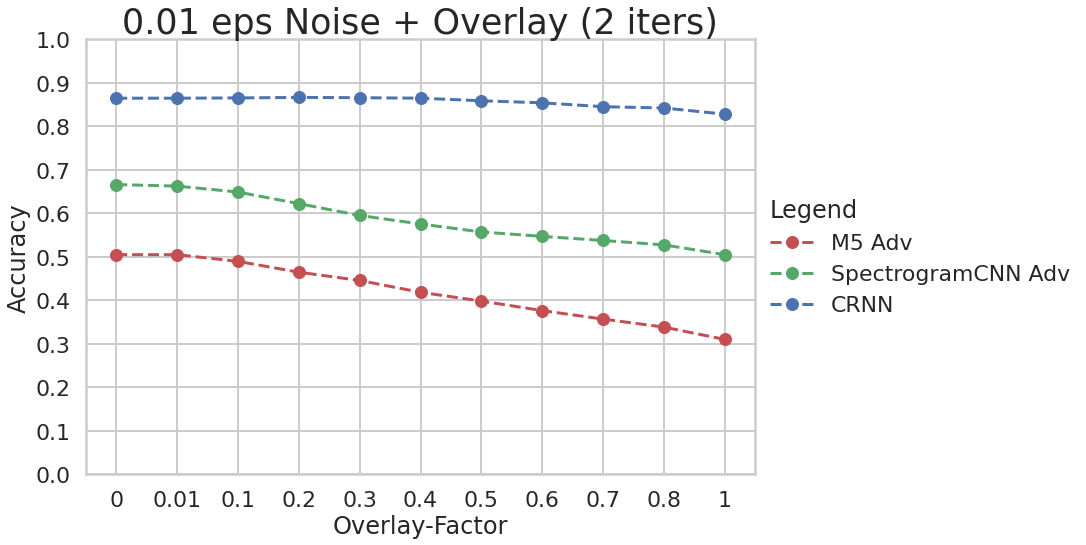

In [14]:
experiment.compare(config_key = "upper2", results_key = "acc", 
                   models=[
                       ('M5_attack_L_inf, eps=sample_u_0.01_0.3_v150.p', "M5 Adv"),
                       ('SpectrogramCNN_8K_attack_L_inf_eps=0.1_iters=1_v6.p', "SpectrogramCNN Adv"),
                       ('CRNN8k_attack_L_inf_eps=0.03_iters=2_v11.p', "CRNN"),
                       ],  colors=["r", "g", "b"], x_title="Overlay-Factor")